In [ ]:
!pip install plotly-express

In [ ]:
import pandas as pd
import plotly_express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot

In [ ]:
data_df = pd.read_csv('ex1data1.txt', header=None, names=['X','y'])
data_df.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
X=data_df['X'].to_numpy().reshape(data_df.shape[0],1)
ones = np.ones((data_df.shape[0],1))
X = np.concatenate((ones, X), axis=1)
y=data_df['y'].to_numpy().reshape(data_df.shape[0],1)

**Use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).**

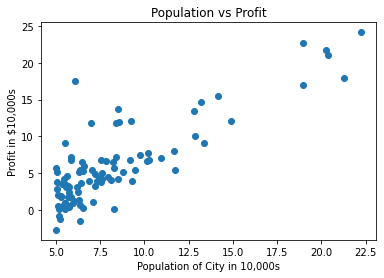

In [ ]:
plt.scatter(x=data_df['X'], y=data_df['y'])
plt.title('Population vs Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [ ]:
theta = np.zeros(2)
def MSE(X,y,theta):
    m = len(y)
    J=0
    theta=theta.reshape(2,1)
    h_x = np.dot(X,theta)
    error_term = sum((h_x - y)**2)
    loss = error_term/(2*m)
    return loss

In [ ]:
MSE(X,y,theta)

array([32.07273388])

**The Mean Square Error for Theta [0,0] is 32.072**

In [ ]:
def gradient_descent(X, y,alpha, theta=np.array([[0],[0]]),
                     num_iterations=1500):
    m = len(y)
    J_old = []
    theta0_old = []
    theta1_old = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        term_vector = np.array([[term0],[term1]])

        theta = theta - term_vector.reshape(2,1)
        theta0_old.append(theta[0].tolist()[0])
        theta1_old.append(theta[1].tolist()[0])
        J_old.append(MSE(X,y,theta).tolist()[0])
        
    return (theta, J_old, theta0_old, theta1_old)

The MSE Error Value is: [4.48658514] for alpha: 0.01
The Best Fit Line is: -3.57 + 1.16x


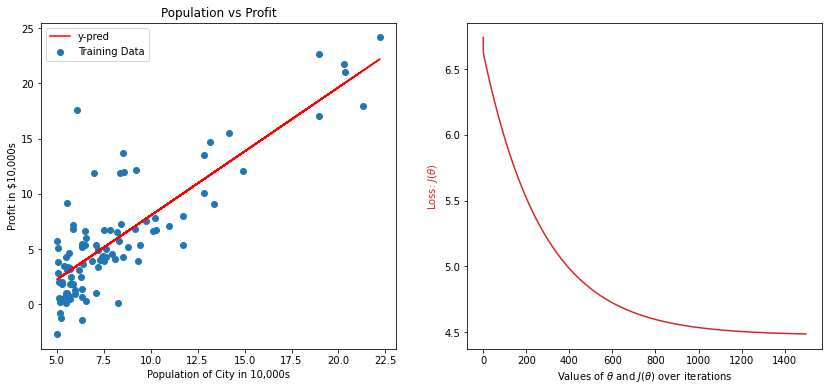

In [ ]:
num_iterations=1500
theta_init=np.array([[1],[1]])
alpha=0.01
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y,alpha, theta_init,
                                                                  num_iterations)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

plt.subplot(1, 2,1)
plt.scatter(X[:,1],y, label = 'Training Data')
plt.title('Population vs Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], X.dot(theta),color='red',label='y-pred')
plt.legend(loc='best')

print('The MSE Error Value is:',MSE(X,y,theta),'for alpha:',alpha)
print('The Best Fit Line is:','%0.2f + %0.2fx'%(theta[0],theta[1]))


plt.subplot(1, 2,2)
color='tab:red'
plt.plot(J_history, label='Loss function', color=color)
plt.xlabel('Values of $\\theta$ and $J(\\theta)$ over iterations')
plt.ylabel('Loss: $J(\\theta)$', color=color)

plt.show()

In [ ]:
theta0_vals = np.linspace(-10,0,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = MSE(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
              width=600, height=600, xaxis_title='theta0', 
              yaxis_title='theta1')
fig.show()

**Comparison With Different Values of Alpha's**

The MSE Error Value is: [4.48658514] for alpha: 0.01


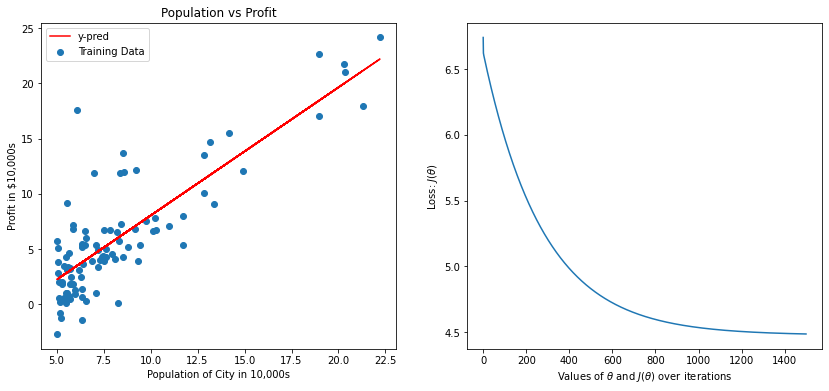

The MSE Error Value is: [5.73215286] for alpha: 0.001


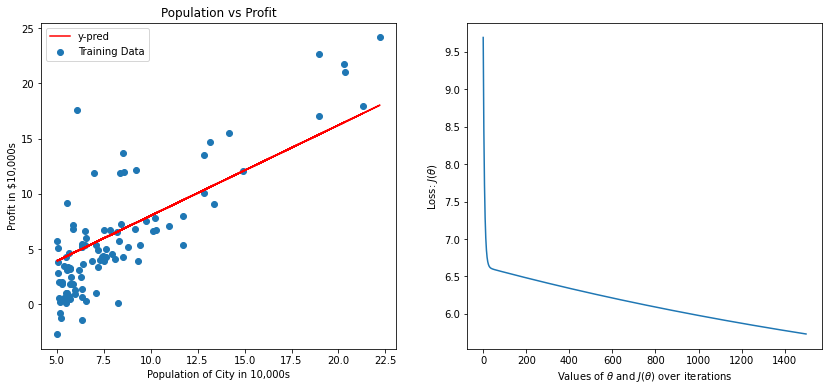

The MSE Error Value is: [6.51917474] for alpha: 0.0001


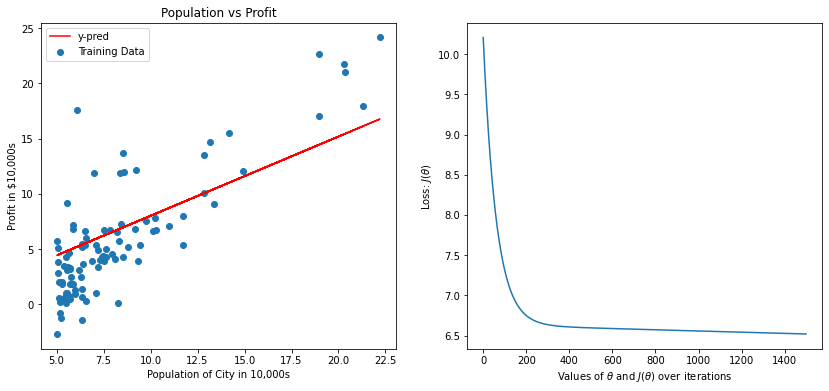

The MSE Error Value is: [4.47701383] for alpha: 0.02


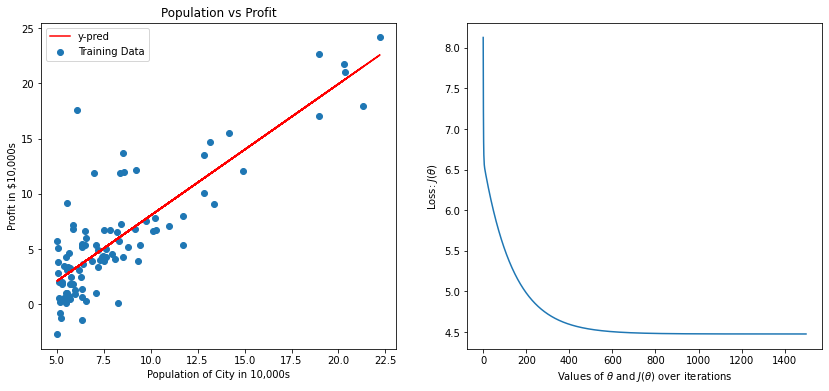

The MSE Error Value is: [5.20774991] for alpha: 0.002


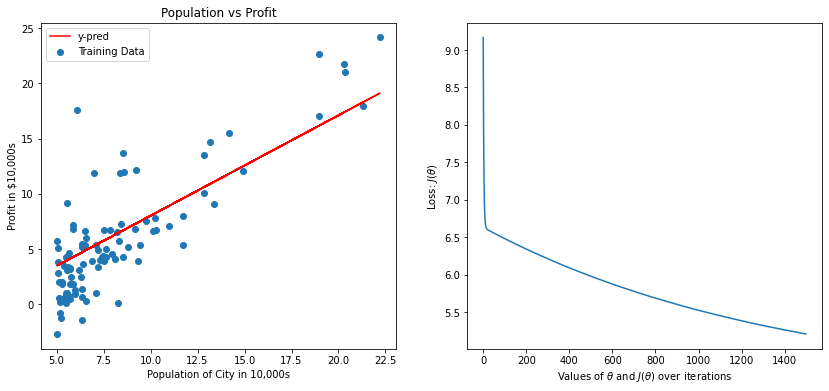

The MSE Error Value is: [6.41166691] for alpha: 0.0002


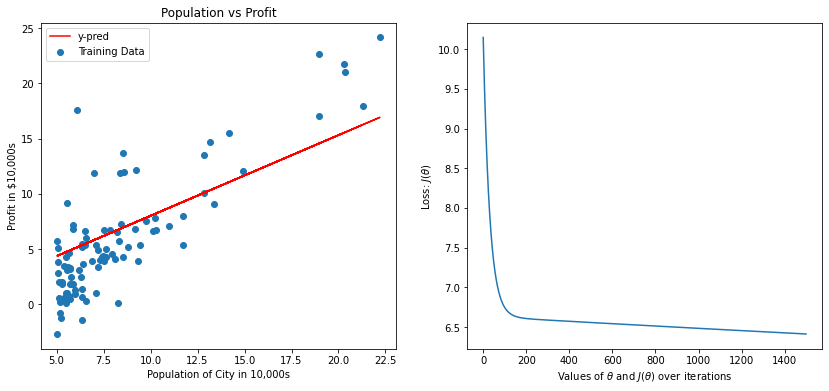

In [ ]:
alp=[0.01,0.001,0.0001,0.02,0.002,0.0002]
for i in range(len(alp)):
  num_iterations=1500
  theta_init=np.array([[1],[1]])
  alpha=alp[i]
  theta, J_history, theta0_history, theta1_history = gradient_descent(X,y,alpha, theta_init,
                                                                     num_iterations)
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
  plt.subplot(1, 2,1)
  plt.scatter(X[:,1],y, label = 'Training Data')
  plt.title('Population vs Profit')
  plt.xlabel('Population of City in 10,000s')
  plt.ylabel('Profit in $10,000s')
  plt.plot(X[:,1], X.dot(theta),color='red',label='y-pred')
  plt.legend(loc='best')

  print('The MSE Error Value is:',MSE(X,y,theta),'for alpha:',alpha)


  plt.subplot(1, 2,2)
  color='tab:red'
  plt.plot(J_history, label='Loss function')
  plt.xlabel('Values of $\\theta$ and $J(\\theta)$ over iterations')
  plt.ylabel('Loss: $J(\\theta)$')
  plt.show()

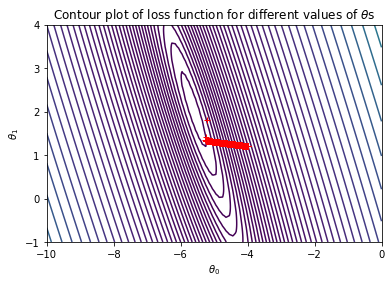

The MSE Error Value is: [4.47773604] for alpha: 0.01


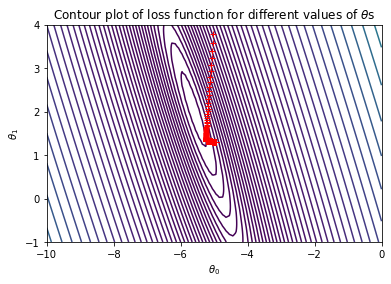

The MSE Error Value is: [4.57680722] for alpha: 0.001


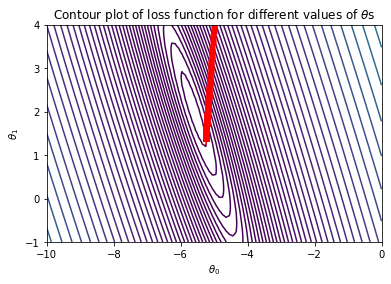

The MSE Error Value is: [4.63940614] for alpha: 0.0001


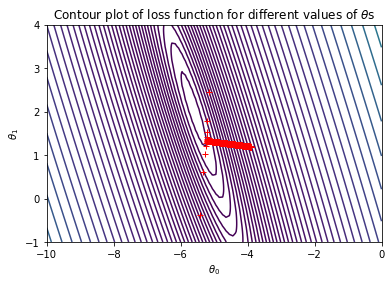

The MSE Error Value is: [4.47697475] for alpha: 0.02


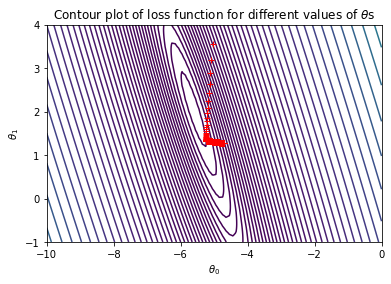

The MSE Error Value is: [4.53509675] for alpha: 0.002


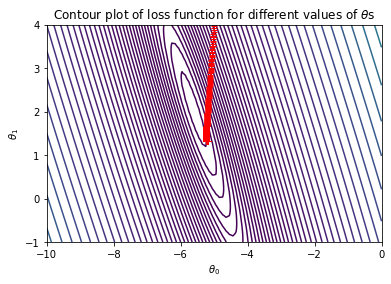

The MSE Error Value is: [4.63085508] for alpha: 0.0002


In [ ]:
alp=[0.01,0.001,0.0001,0.02,0.002,0.0002]
for i in range(len(alp)):
  num_iterations=1500
  theta_init=np.array([[-5],[4]])
  alpha=alp[i]
  theta, J_history, theta0_history, theta1_history = gradient_descent(X,y,alpha, theta_init,
                                                                    num_iterations)

  plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(-2,3,100))
  plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
  plt.title("Contour plot of loss function for different values of $\\theta$s")
  plt.plot(theta0_history, theta1_history, 'r+')
  plt.show()
  print('The MSE Error Value is:',MSE(X,y,theta),'for alpha:',alpha)